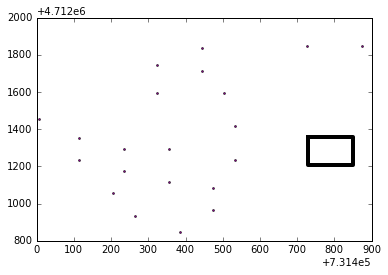

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

harv_plotloc_csv = pd.read_csv('_data-jsta/HARV/HARV_PlotLocations.csv')
harv_plotloc_csv.head(5)
harv_plotloc_csv.axes

harv_plotloc_csv['easting'].head(6)
harv_plotloc_csv['northing'].head(6)

harv_plotloc_csv['geodeticDa'].head(6)
harv_plotloc_csv['utmZone'].head(6)

lines_harv = gpd.read_file('_data-jsta/HARV/HARV_roads.shp')
lines_harv.crs

crs = lines_harv.crs
geometry = [Point(xy) for xy in zip(harv_plotloc_csv.easting, harv_plotloc_csv.northing)]
harv_plotloc_geo = gpd.GeoDataFrame(harv_plotloc_csv, crs = crs, geometry = geometry)

f, ax = plt.subplots(1)
aoi_boundary_harv = gpd.read_file('_data-jsta/HARV/HarClip_UTMZ18.shp')

for poly in aoi_boundary_harv['geometry']:
	gpd.plotting.plot_multipolygon(ax, poly, alpha = 0, linewidth = 4)

for point in harv_plotloc_geo['geometry']:
 	gpd.plotting.plot_point(ax, point, color = 'purple')

plt.show()
